## Final Exam

#### Perform exploratory data analysis for any dataset from https://data.boston.gov/. 
Do not use datasets already covered in class, or used in your final project.
Use pandas and/or in-built Python libraries to read and process the data.

#### Ideas for data analysis:
Identify missing data and filling it with values where appropriate \
Renaming columns \
Grouping data and performing aggregate calculations on one or more columns \
Creating visualizations using matplotlib, pyplot or other plotting libraries: visualizations could be histograms, bar charts, scatter plots, geographical maps, etc. \
If using multiple data sources, what common values can they be joined (combined) on?

#### Ask 4 - 5 questions about the data that are answered by your analysis.
Submit your Python code and/or Jupyter notebook, along with the sample data (or a link to it) that was used for analysis.

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import folium

In [4]:
#### Data from https://data.boston.gov/dataset/buildbps-facilities-and-educational-data-for-boston-public-schools

In [5]:
bps = pd.read_csv('data/buildbps.csv')

In [6]:
bps.head()

,SMMA_Identifier,SMMA_Only_For_Map,BPS_School_Name,BPS_Historical_Name,SMMA_Abbreviated_Name,BPS_Address,BRA_Neighborhood,SMMA_latitude,SMMA_longitude,SMMA_Typology,...,SMMA_EA_K8_Adequacy_Cafeteria,SMMA_EA_K8_Adequacy_Stage,SMMA_EA_K8_Adequacy_Medical,SMMA_EA_K8_Adequacy_Administration,SMMA_EA_K8_Adequacy_Custodial,SMMA_EA_K8_Adequacy_Network,SMMA_EA_K8_Adequacy_Other_1,SMMA_EA_K8_Adequacy_Other_2,SMMA_EA_K8_Adequacy_Other_3,SMMA_EA_K8_Overall_EFE_spaces
0,031,NaN,"Adams, Samuel Elementary",Adams,Adams,"165 Webster St East Boston, MA 02128",East Boston,42.365553,-71.034917,Elementary School,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,078,NaN,"Alighieri, Dante Montessori School",Alighieri,Alighieri,"37 Gove Street East Boston, MA 02128",East Boston,42.371565,-71.037608,Elementary School,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,045A,NaN,Another Course to College*,Taft,ACC*,"20 Warren Street Brighton, MA 02135",Allston,42.350354,-71.145582,High School,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,012,NaN,Baldwin Early Learning Pilot Academy,Baldwin ELC,Baldwin,"121 Corey Rd Brighton, MA 02135",Brighton,42.342037,-71.140529,Early Learning,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,087,NaN,"Bates, Phineas Elementary",Bates,Bates,"426 Beech St Roslindale, MA 02131",Roslindale,42.277663,-71.135353,Elementary School,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Create initial map of all BPS schools

In [7]:
m = folium.Map(location=[bps['SMMA_latitude'][0], bps['SMMA_longitude'][0]], zoom_start=10)
for point in range (0, len(bps)):
    folium.Marker(
        [bps['SMMA_latitude'][point], bps['SMMA_longitude'][point]],
        popup = bps['BPS_School_Name'][point],
    ).add_to(m)
m

In [8]:
# To color code based on school level, first pull out the level options

In [9]:
bps['SMMA_Typology'].unique()

array(['Elementary School', 'High School', 'Early Learning', 'Special',
       'K-8', 'Middle School'], dtype=object)

### Color code markers based on school level: 

In [10]:
level_color = ['beige' for x in range(0, len(bps))]
for item in range (0, len(level_color)):
    if bps['SMMA_Typology'][item]=='Elementary School':
        level_color[item] = 'red'
    elif bps['SMMA_Typology'][item]=='Middle School':
        level_color[item] = 'blue'
    elif bps['SMMA_Typology'][item]=='High School':
        level_color[item] = 'green'

#### Add level color column to DataFrame:

In [11]:
bps['level_color'] = level_color

#### Re-plot with school level color coding:

In [12]:
m = folium.Map(location=[bps['SMMA_latitude'][0], bps['SMMA_longitude'][0]], zoom_start=10)
for point in range (0, len(bps)):
    folium.Marker(
        [bps['SMMA_latitude'][point], bps['SMMA_longitude'][point]],
        popup = bps['BPS_School_Name'][point],
        icon = folium.Icon(color=bps['level_color'][point])
    ).add_to(m)
m

# Beige = Other; red = Elementary; blue = Middle; green = High School

#### A lot of schools fall under my beige "other" category.  Let's look at a histogram breakdown of the school levels:

(array([48.,  0., 35.,  0.,  6.,  0.,  8.,  0., 37.,  7.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

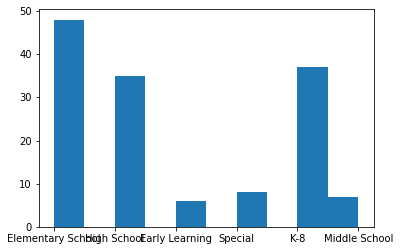

In [13]:
plt.hist(bps["SMMA_Typology"])

#### From the histogram we can see there's a category "K-8" that I missed.  Let's re-do the coloring to capture this level.

In [14]:
bps['level_color'] = ['white' for x in range(0, len(bps))]
for item in range (0, len(level_color)):
    if bps['SMMA_Typology'][item]=='Elementary School':
        bps['level_color'][item] = 'orange'
    elif bps['SMMA_Typology'][item]=='K-8':
        bps['level_color'][item] = 'purple'
    elif bps['SMMA_Typology'][item]=='Middle School':
        bps['level_color'][item] = 'gray'
    elif bps['SMMA_Typology'][item]=='High School':
        bps['level_color'][item] = 'green'

<ipython-input-14-ea8cdb9a8324>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bps['level_color'][item] = 'orange'
<ipython-input-14-ea8cdb9a8324>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bps['level_color'][item] = 'green'
<ipython-input-14-ea8cdb9a8324>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bps['level_color'][item] = 'purple'
<ipython-input-14-ea8cdb9a8324>:8: SettingWithCopyWarning: 
A value is trying to be set 

#### Re-plot with K-8 as separate color: 

In [15]:
m = folium.Map(location=[bps['SMMA_latitude'][0], bps['SMMA_longitude'][0]], zoom_start=12)
for point in range (0, len(bps)):
    folium.Marker(
        [bps['SMMA_latitude'][point], bps['SMMA_longitude'][point]],
        popup = bps['BPS_School_Name'][point],
        icon = folium.Icon(color=bps['level_color'][point])
    ).add_to(m)
m
# white = Other; orange = Elementary; purple = K-8; gray = Middle; green = High School

### School characteristics by neighborhood

#### Which neighborhoods have the most kids enrolled in BPS? 
Dorchester, Roxbury, East Boston.

In [16]:
bps_ebn = bps.groupby(["BRA_Neighborhood"])["DOE_Total"].sum()
bps_ebn

BRA_Neighborhood
Allston                   1918
Back Bay                   373
Bay Village                677
Brighton                  2364
Charlestown               2389
Chinatown                  796
Dorchester               10447
East Boston               5244
Fenway                     761
Hyde Park                 2147
Jamaica Plain             4462
Longwood Medical Area     2439
Mattapan                  2276
Mission Hill               983
North End                  517
Roslindale                2230
Roxbury                   9008
South Boston              2402
South End                 1163
West Roxbury              2987
Name: DOE_Total, dtype: int64

<AxesSubplot:title={'center':'Students Enrolled'}, xlabel='Neighborhood', ylabel='Number of Students'>

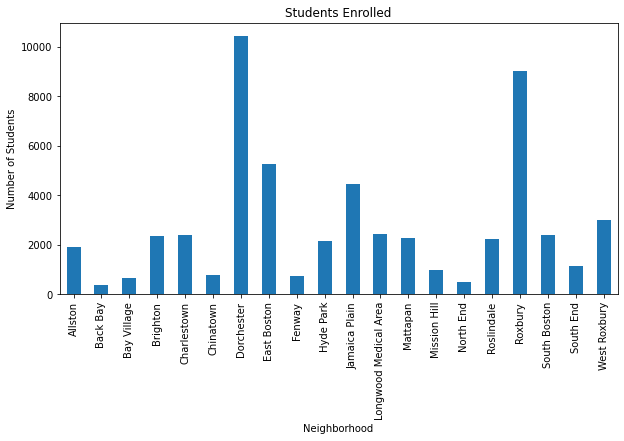

In [17]:
bps_ebn.plot(
    kind='bar', 
    title='Students Enrolled', 
    ylabel='Number of Students',
    xlabel='Neighborhood', 
    figsize=(10, 5)
)

#### Which neighborhoods have the most schools?  
Dorchester, Roxbury, JP.

<AxesSubplot:title={'center':'Number of Schools'}, xlabel='Neighborhood', ylabel='Number of Schools'>

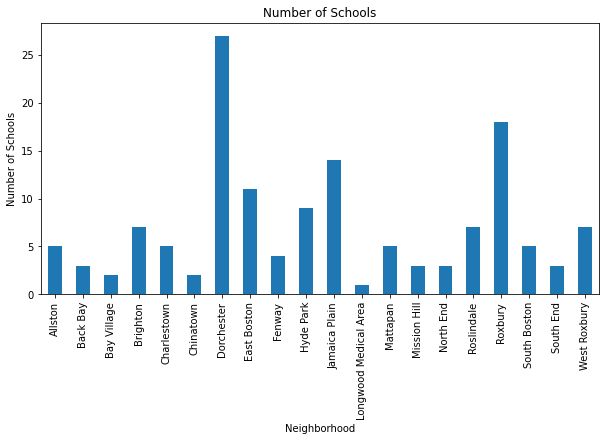

In [18]:
bps_nos = bps.groupby(["BRA_Neighborhood"])["SMMA_Identifier"].count()
bps_nos.plot(
    kind='bar', 
    title='Number of Schools', 
    ylabel='Number of Schools',
    xlabel='Neighborhood', 
    figsize=(10, 5)
)

#### Which neighborhood(s) have the highest and lowest average students per school?
Highest:  Longwood Medical Area (potentially an outlier) \
Lowest:  Back Bay

<AxesSubplot:title={'center':'Students per School (Average)'}, xlabel='Neighborhood', ylabel='Students per School'>

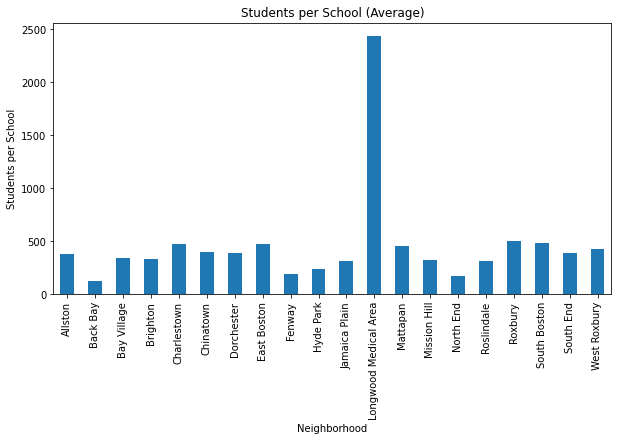

In [19]:
bps_ros = \
    bps.groupby(["BRA_Neighborhood"])["DOE_Total"].sum() \
        / bps.groupby(["BRA_Neighborhood"])["SMMA_Identifier"].count()
bps_ros.plot(
    kind='bar', 
    title='Students per School (Average)', 
    ylabel='Students per School',
    xlabel='Neighborhood', 
    figsize=(10, 5)
)

##### Another way to compare students vs number of schools is with a scatterplot:

Text(0, 0.5, 'Number of Students')

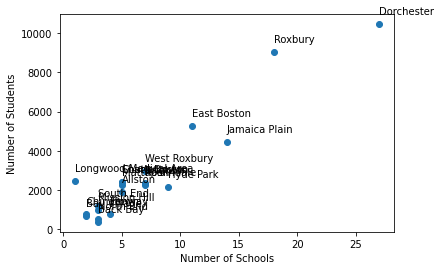

In [20]:
x = bps.groupby(["BRA_Neighborhood"])["SMMA_Identifier"].count()
y = bps.groupby(["BRA_Neighborhood"])["DOE_Total"].sum()
nbds = bps["BRA_Neighborhood"].unique()

plt.scatter(x, y)

index=0
for a,b in zip(x,y):

    label = "{:.2f}".format(b)

    plt.annotate(sorted(nbds)[index], # this is the text
                 (a,b), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center
    index=index+1    

plt.xlabel("Number of Schools")
plt.ylabel("Number of Students")

#### What is the distribution of school levels within each neighborhood?
##### Observations:
Dorchester and Roxbury have similar distributions of elementary, middle, and high schools. \
Back Bay has only high schools, and has four of them. \
Roslindale has 5 elementary schools and no high schools. \
East Boston has no middle schools and only one high school. \
Dorchester, Roxbury, and JP have the most options across all levels.

<AxesSubplot:title={'center':'Number of Schools by Level'}, xlabel='Neighborhood', ylabel='Number of Schools'>

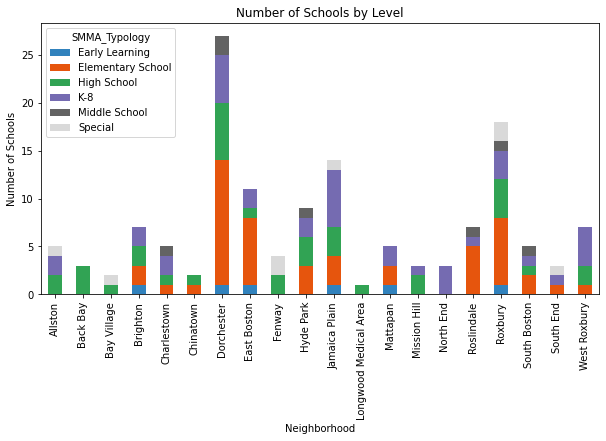

In [21]:
bps.groupby(['BRA_Neighborhood', 'SMMA_Typology']).size().unstack().plot(
    kind='bar', 
    stacked=True, 
    title='Number of Schools by Level', 
    ylabel='Number of Schools',
    xlabel='Neighborhood', 
    cmap='tab20c', # Matched bar colors with marker colors in earlier map 
    figsize=(10,5)
)

#### What is distribution of Building Conditions (Excellent through Poor) within each neighborhood?
##### Observations:
The vast majority of buildings in BPS are in either Good or Fair condition. \
Mattapan has the most schools in Excellent condition, even though it only has 5 schools.  60% of Mattapan schools are in Excellent condition. \
There are very few schools considered in "Poor" condition.

<AxesSubplot:title={'center':'Number of Schools by Building Condition'}, xlabel='Neighborhood', ylabel='Number of Schools'>

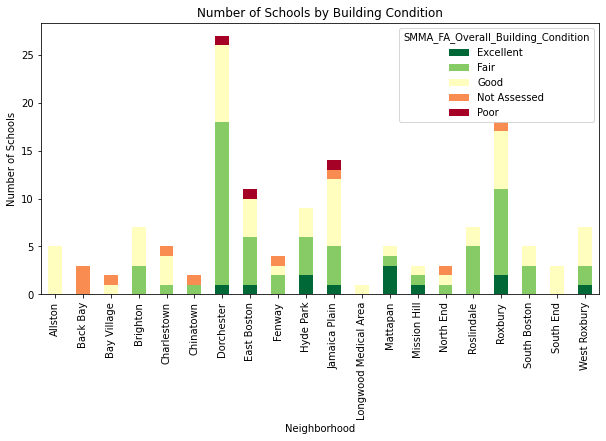

In [22]:
bps.groupby(['BRA_Neighborhood', 'SMMA_FA_Overall_Building_Condition']).size().unstack().plot(
    kind='bar', 
    stacked=True, 
    title='Number of Schools by Building Condition',
    ylabel='Number of Schools',
    xlabel='Neighborhood', 
    cmap='RdYlGn_r', # Chosen so red = Poor; green = Excellent
    figsize=(10,5)
)